# Kuramoto Models: Cartesian vs Polar Coupling Comparison

This notebook compares Kuramoto oscillator models with:
- **Polar Coupling**: Distance based on polar coordinates (periodic in θ)
- **Cartesian Coupling**: Distance based on Euclidean coordinates (no periodic boundaries)

Both models share the same grid and initial conditions for direct comparison.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc
from kuramoto_models import (
    setup_euclidean_grid,
    compute_coupling_cartesian,
    compute_coupling_polar,
    run_kuramoto_simulation,
    compute_order_parameter,
    plot_connectivity_map,
    plot_phase_comparison,
    compute_spiral_index_timeseries
)

%matplotlib inline

## 1. Define Parameters

In [11]:
# Main user-defined parameters
N_euclidean = 50     # Grid resolution
r_coupling = 0.4   # Coupling radius
T_total = 50.0      # Simulation time
seed = 6            # Random seed for reproducibility

# Additional parameters
r_max = 1.0          # Spatial domain radius
K = 3              # Coupling strength
p_coupling = 0.25    # Connection probability
omega_mean = 5.0     # Mean natural frequency
omega_std = 0.5      # Std dev of natural frequencies
noise_scale = 0.0    # Noise intensity (0 = no noise)
dt = 0.01            # Time step
save_interval = 25   # Save every N steps

# Polar coupling parameters
theta_scale = 0.5    # Angular distance scaling
r_scale = 1.0        # Radial distance scaling
Lx = 2 * np.pi       # Period for angular coordinate

## 2. Setup Grid (Shared by Both Models)

In [12]:
# Create grid
x_points, y_points, theta_points, r_points, mask, X_grid, Y_grid = \
    setup_euclidean_grid(N_euclidean, r_max)

n_points = len(x_points)

# Initialize natural frequencies (shared by both models)
np.random.seed(seed)
omega = omega_mean + omega_std * np.random.randn(n_points)

print(f'Natural frequencies: mean={omega.mean():.3f}, std={omega.std():.3f}')

Grid created: 1876 points within radius 1.0
Natural frequencies: mean=5.007, std=0.486


## 3. Visualize Point Distribution

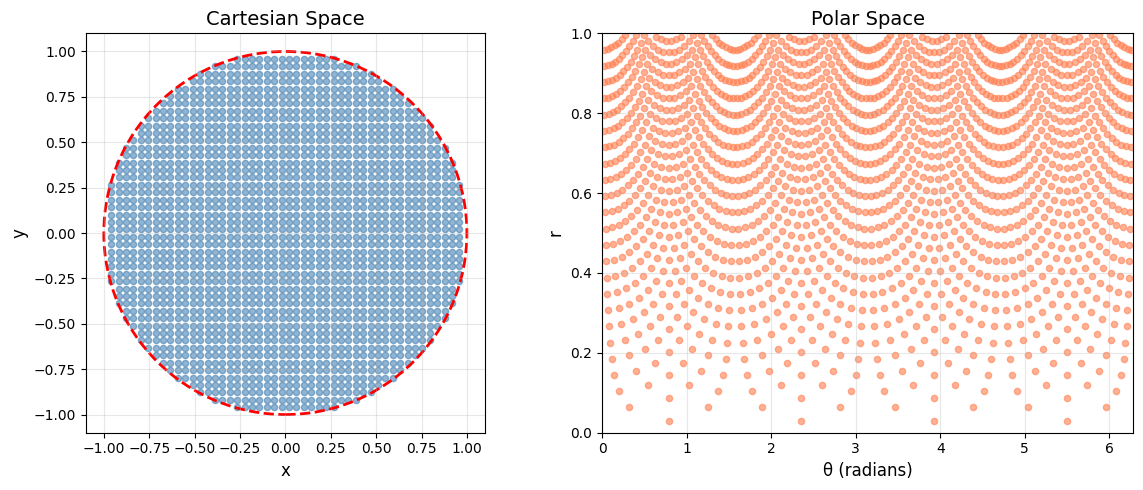

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Cartesian view
axes[0].scatter(x_points, y_points, s=20, alpha=0.6, c='steelblue')
circle = plt.Circle((0, 0), r_max, color='r', fill=False, linestyle='--', linewidth=2)
axes[0].add_patch(circle)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Cartesian Space', fontsize=14)
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)

# Polar view
axes[1].scatter(theta_points, r_points, s=20, alpha=0.6, c='coral')
axes[1].set_xlabel('θ (radians)', fontsize=12)
axes[1].set_ylabel('r', fontsize=12)
axes[1].set_title('Polar Space', fontsize=14)
axes[1].set_xlim([0, 2*np.pi])
axes[1].set_ylim([0, r_max])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Run Polar Kuramoto Model

In [14]:
print("="*60)
print("POLAR KURAMOTO MODEL")
print("="*60)

# Set seed for coupling generation
np.random.seed(seed)

# Compute coupling (Polar metric)
coupling_polar = compute_coupling_polar(
    theta_points, r_points, r_coupling, p_coupling, 
    theta_scale, r_scale, Lx
)

# Run simulation
phase_history_polar, time_points = run_kuramoto_simulation(
    coupling_polar, omega, dt, T_total, save_interval, K, noise_scale, seed
)

print("="*60)

POLAR KURAMOTO MODEL
Computing coupling matrix (Polar distances)...
  Processed 500/1876 points
  Processed 1000/1876 points
  Processed 1500/1876 points
Coupling computed: 140320 total connections
Average connections per oscillator: 74.8
Converting to sparse matrix format...
Sparse matrix created: 140320 connections
Average connections: 74.8
Starting simulation...
Step 1000/5000 (t=10.0), elapsed: 0.3s
Step 2000/5000 (t=20.0), elapsed: 0.6s
Step 3000/5000 (t=30.0), elapsed: 1.0s
Step 4000/5000 (t=40.0), elapsed: 1.3s
Step 5000/5000 (t=50.0), elapsed: 1.6s
Simulation complete!


## 5. Run Cartesian Kuramoto Model

In [15]:
print("="*60)
print("CARTESIAN KURAMOTO MODEL")
print("="*60)

# Set seed for coupling generation
np.random.seed(seed)

# Compute coupling (Cartesian metric)
coupling_cart = compute_coupling_cartesian(
    x_points, y_points, r_coupling, p_coupling
)

# Run simulation
phase_history_cart, time_points = run_kuramoto_simulation(
    coupling_cart, omega, dt, T_total, save_interval, K, noise_scale, seed
)

print("="*60)

CARTESIAN KURAMOTO MODEL
Computing coupling matrix (Cartesian distances)...
  Processed 500/1876 points
  Processed 1000/1876 points
  Processed 1500/1876 points
Coupling computed: 113764 total connections
Average connections per oscillator: 60.6
Converting to sparse matrix format...
Sparse matrix created: 113764 connections
Average connections: 60.6
Starting simulation...
Step 1000/5000 (t=10.0), elapsed: 0.3s
Step 2000/5000 (t=20.0), elapsed: 0.5s
Step 3000/5000 (t=30.0), elapsed: 0.8s
Step 4000/5000 (t=40.0), elapsed: 1.1s
Step 5000/5000 (t=50.0), elapsed: 1.4s
Simulation complete!


## 6. Visualize Connectivity Maps

Example points:
  Edge point:   index=981, (x,y)=(0.796, 0.020), r=0.796
Figure saved to: connectivity_maps_4directions-5c.pdf


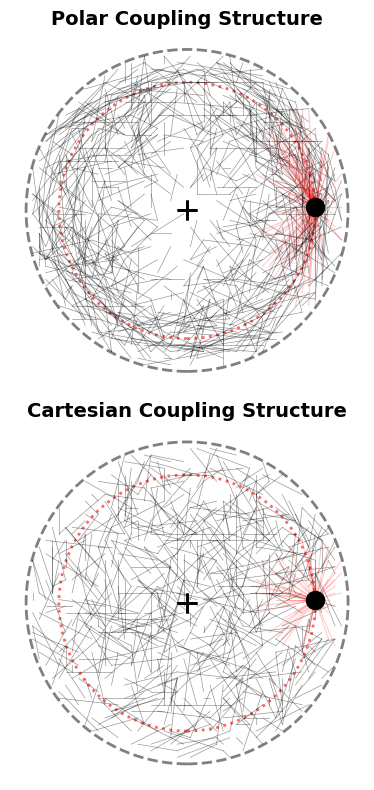

In [16]:
# Modified "Visualize Connectivity Map" Cell
# This replaces the cell that starts around line 360 in your notebook
# Find point near edge (large r, preferably at theta ~ pi/4 for visibility)
edge_candidates = np.where((r_points < 0.8) & (r_points > 0.75))[0]
if len(edge_candidates) > 0:
    # Among edge candidates, find one at roughly 45 degrees
    edge_theta_target = np.pi* 0
    edge_idx = edge_candidates[np.argmin(np.abs(theta_points[edge_candidates] - edge_theta_target))]
else:
    edge_idx = np.argmax(r_points)

print(f"Example points:")
print(f"  Edge point:   index={edge_idx}, (x,y)=({x_points[edge_idx]:.3f}, {y_points[edge_idx]:.3f}), r={r_points[edge_idx]:.3f}")


fig, axes = plt.subplots(2, 1, figsize=(4, 8))
pPlot = 0.005  # Plot a fraction of connections
arrow_scale = 4  # Scale for mean connectivity arrows

# ===== POLAR COUPLING =====
np.random.seed(seed)  # For consistent connection sampling
axes[0].set_title('Polar Coupling Structure', fontsize=14, fontweight='bold')

# Plot sparse background connections
for i in range(n_points):
    if len(coupling_polar[i]['neighbors']) > 0:
        neighbors_idx = coupling_polar[i]['neighbors']
        thisX = x_points[i]
        thisY = y_points[i]
        
        for neighbor_idx in neighbors_idx:
            if np.random.rand() < pPlot:
                thatX = x_points[neighbor_idx]
                thatY = y_points[neighbor_idx]
                axes[0].plot([thisX, thatX], [thisY, thatY], 'k-', linewidth=0.5, alpha=0.4)

# Highlight connections for edge point (red, semi-transparent)
if len(coupling_polar[edge_idx]['neighbors']) > 0:
    neighbors_idx = coupling_polar[edge_idx]['neighbors']
    thisX = x_points[edge_idx]
    thisY = y_points[edge_idx]
    for neighbor_idx in neighbors_idx:
        thatX = x_points[neighbor_idx]
        thatY = y_points[neighbor_idx]
        axes[0].plot([thisX, thatX], [thisY, thatY], 'r-', linewidth=0.8, alpha=0.2)
    
    axes[0].plot(thisX, thisY, 'ko', markersize=12, markeredgecolor='k', markeredgewidth=2, label='Edge point', zorder=10)

circle1 = plt.Circle((0, 0), r_max, color='gray', fill=False, linestyle='--', linewidth=2)
# Add center marker (origin)
axes[0].plot(0, 0, 'k+', markersize=15, markeredgewidth=2, label='Center')
axes[1].plot(0, 0, 'k+', markersize=15, markeredgewidth=2, label='Center')
    
axes[0].add_patch(circle1)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)
# axes[0].legend(loc='upper right', fontsize=10)
axes[0].axis('off')

# ===== CARTESIAN COUPLING =====
np.random.seed(seed)  # For consistent connection sampling
axes[1].set_title('Cartesian Coupling Structure', fontsize=14, fontweight='bold')

# Plot sparse background connections
for i in range(n_points):
    if len(coupling_cart[i]['neighbors']) > 0:
        neighbors_idx = coupling_cart[i]['neighbors']
        thisX = x_points[i]
        thisY = y_points[i]
        
        for neighbor_idx in neighbors_idx:
            if np.random.rand() < pPlot:
                thatX = x_points[neighbor_idx]
                thatY = y_points[neighbor_idx]
                axes[1].plot([thisX, thatX], [thisY, thatY], 'k-', linewidth=0.5, alpha=0.4)

# Highlight connections for edge point (red, semi-transparent)
if len(coupling_cart[edge_idx]['neighbors']) > 0:
    neighbors_idx = coupling_cart[edge_idx]['neighbors']
    thisX = x_points[edge_idx]
    thisY = y_points[edge_idx]
    for neighbor_idx in neighbors_idx:
        thatX = x_points[neighbor_idx]
        thatY = y_points[neighbor_idx]
        axes[1].plot([thisX, thatX], [thisY, thatY], 'r-', linewidth=0.8, alpha=0.2)
    
    axes[1].plot(thisX, thisY, 'ko', markersize=12, markeredgecolor='k', markeredgewidth=2, label='Edge point', zorder=10)

circle2 = plt.Circle((0, 0), r_max, color='gray', fill=False, linestyle='--', linewidth=2)
# Add center marker (origin)
axes[0].plot(0, 0, 'k+', markersize=15, markeredgewidth=2, label='Center')
axes[1].plot(0, 0, 'k+', markersize=15, markeredgewidth=2, label='Center')


circle_edge = plt.Circle((0, 0), r_points[edge_idx], color='red', 
                        fill=False, linestyle=':', linewidth=2, alpha=0.6)
axes[0].add_patch(circle_edge)
circle_edge2 = plt.Circle((0, 0), r_points[edge_idx], color='red', 
                         fill=False, linestyle=':', linewidth=2, alpha=0.6)
axes[1].add_patch(circle_edge2)


axes[1].add_patch(circle2)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)
# axes[1].legend(loc='upper right', fontsize=10)
axes[1].set_aspect('equal')
axes[1].axis('off')

plt.tight_layout()
plt.savefig('connectivity_maps_4directions-5c.pdf', bbox_inches='tight', dpi=300)
print('Figure saved to: connectivity_maps_4directions-5c.pdf')
plt.show()



Selected 8 points at radius ≈ 0.6:
  Point 1: index=929, (x,y)=(0.633, -0.020), r=0.633, θ=6.251
  Point 2: index=1444, (x,y)=(0.429, 0.429), r=0.606, θ=0.785
  Point 3: index=1640, (x,y)=(-0.020, 0.633), r=0.633, θ=1.603
  Point 4: index=1423, (x,y)=(-0.429, 0.429), r=0.606, θ=2.356
  Point 5: index=898, (x,y)=(-0.633, -0.020), r=0.633, θ=3.174
  Point 6: index=431, (x,y)=(-0.429, -0.429), r=0.606, θ=3.927
  Point 7: index=234, (x,y)=(-0.020, -0.633), r=0.633, θ=4.680
  Point 8: index=452, (x,y)=(0.429, -0.429), r=0.606, θ=5.498
Figure saved to: connectivity_maps_8points_svd_cyclic.pdf


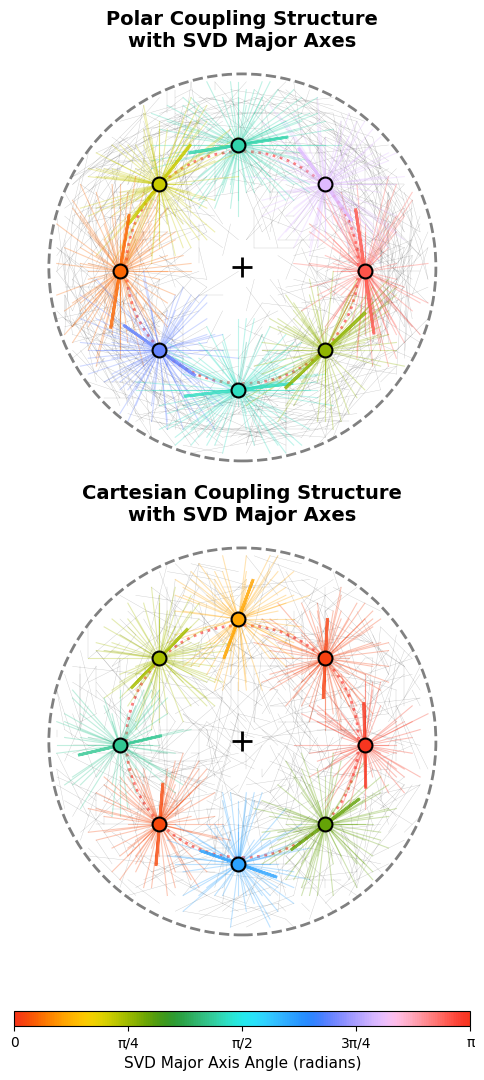

In [17]:
# Modified Connectivity Visualization Cell
# Replace the cell starting at line 287 in your notebook with this code

# Define multiple radii to analyze
target_radii = [0.6]  # List of radii at which to select 8 points
radius_tolerance = 0.05  # Tolerance for finding points near target radius

# Dictionary to store selected indices for each radius
all_selected_indices = {}

# Select 8 evenly distributed points at each target radius
for target_radius in target_radii:
    # Find points near the target radius
    radius_candidates = np.where((r_points >= target_radius - radius_tolerance) & 
                                  (r_points <= target_radius + radius_tolerance))[0]

    if len(radius_candidates) < 8:
        print(f"Warning: Only {len(radius_candidates)} points found near radius {target_radius}")
        print("Consider increasing radius_tolerance or choosing a different radius")
        continue

    # Select 8 evenly spaced points in angle
    target_angles = np.linspace(0, 2*np.pi, 8, endpoint=False)
    selected_indices = []

    for target_angle in target_angles:
        # Find the closest point in angle among radius candidates
        angle_diffs = np.abs(theta_points[radius_candidates] - target_angle)
        # Handle wraparound at 2π
        angle_diffs = np.minimum(angle_diffs, 2*np.pi - angle_diffs)
        closest_idx = radius_candidates[np.argmin(angle_diffs)]
        selected_indices.append(closest_idx)
    
    all_selected_indices[target_radius] = selected_indices
    
    print(f"\nSelected {len(selected_indices)} points at radius ≈ {target_radius}:")
    for i, idx in enumerate(selected_indices):
        print(f"  Point {i+1}: index={idx}, (x,y)=({x_points[idx]:.3f}, {y_points[idx]:.3f}), "
              f"r={r_points[idx]:.3f}, θ={theta_points[idx]:.3f}")

# Function to compute SVD-based direction vector
def compute_svd_direction(point_idx, coupling_dict, x_points, y_points):
    """
    Compute the major axis direction from SVD of connected points.
    Returns the direction vector and the ratio of singular values.
    """
    if len(coupling_dict[point_idx]['neighbors']) == 0:
        return None, None
    
    # Get coordinates of all connected neighbors
    neighbor_indices = coupling_dict[point_idx]['neighbors']
    neighbor_coords = np.column_stack([x_points[neighbor_indices], 
                                       y_points[neighbor_indices]])
    
    # Center the coordinates (subtract mean)
    centered_coords = neighbor_coords - neighbor_coords.mean(axis=0)
    
    # Perform SVD
    U, S, Vt = np.linalg.svd(centered_coords, full_matrices=False)
    
    # Major axis is the first row of Vt (or first column of V)
    major_axis = Vt[0, :]
    
    # Compute ratio of singular values (magnitude ratio)
    if len(S) > 1 and S[1] > 0:
        sv_ratio = S[0] / S[1]
    else:
        sv_ratio = S[0] if S[0] > 0 else 1.0
    
    return major_axis, sv_ratio


# Create figure
fig, axes = plt.subplots(2, 1, figsize=(6, 12))
pPlot = 0.005  # Plot a fraction of background connections
arrow_scale = 0.2  # Base scale for SVD direction arrows

# Use cyclic colormap for coloring based on SVD vector angle
cyclic_cmap = cc.cm.CET_C6

# ===== POLAR COUPLING =====
np.random.seed(seed)
axes[0].set_title('Polar Coupling Structure\nwith SVD Major Axes', fontsize=14, fontweight='bold')

# Plot sparse background connections
for i in range(n_points):
    if len(coupling_polar[i]['neighbors']) > 0:
        neighbors_idx = coupling_polar[i]['neighbors']
        thisX = x_points[i]
        thisY = y_points[i]
        
        for neighbor_idx in neighbors_idx:
            if np.random.rand() < pPlot:
                thatX = x_points[neighbor_idx]
                thatY = y_points[neighbor_idx]
                axes[0].plot([thisX, thatX], [thisY, thatY], 'k-', linewidth=0.3, alpha=0.2)

# Loop over each radius and plot its 8 points
for target_radius in target_radii:
    if target_radius not in all_selected_indices:
        continue
    
    selected_indices = all_selected_indices[target_radius]
    
    # Plot connections and SVD vectors for each of the 8 selected points at this radius
    for i, idx in enumerate(selected_indices):
        
        # Plot connections for this point
        if len(coupling_polar[idx]['neighbors']) > 0:
            neighbors_idx = coupling_polar[idx]['neighbors']
            thisX = x_points[idx]
            thisY = y_points[idx]
            
            # Compute and plot SVD direction first (to get angle for coloring)
            major_axis, sv_ratio = compute_svd_direction(idx, coupling_polar, x_points, y_points)
            
            if major_axis is not None and sv_ratio is not None:
                # Calculate angle of major axis
                # Since the axis is bidirectional, we only need [0, π] range
                svd_angle = np.arctan2(major_axis[1], major_axis[0])
                # Map to [0, π] by taking absolute value or adding π if negative
                svd_angle_normalized = (svd_angle+np.pi/2) % np.pi  # This maps [-π, π] to [0, π]
                # Map to [0, 1] for colormap
                color_value = 1-svd_angle_normalized / np.pi
                color = cyclic_cmap(color_value)
                
                # Plot connections with the color based on SVD angle
                for neighbor_idx in neighbors_idx:
                    thatX = x_points[neighbor_idx]
                    thatY = y_points[neighbor_idx]
                    axes[0].plot([thisX, thatX], [thisY, thatY], '-', 
                                color=color, linewidth=0.8, alpha=0.3)
                
                # Scale arrow length by singular value ratio
                arrow_length = arrow_scale * sv_ratio
                dx = major_axis[0] * arrow_length
                dy = major_axis[1] * arrow_length
                
                # Plot arrow (bidirectional - showing the axis, not a direction)
                axes[0].arrow(thisX, thisY, dx, dy, 
                             head_width=0.0, head_length=0.0, 
                             fc=color, ec=color, linewidth=2, alpha=0.8, zorder=15)
                axes[0].arrow(thisX, thisY, -dx, -dy, 
                             head_width=0.0, head_length=0.0, 
                             fc=color, ec=color, linewidth=2, alpha=0.8, zorder=15)
                
                # Plot the selected point
                axes[0].plot(thisX, thisY, 'o', color=color, markersize=10, 
                            markeredgecolor='k', markeredgewidth=1.5, zorder=20)
            else:
                # If no SVD direction, just plot the point in gray
                axes[0].plot(thisX, thisY, 'o', color='gray', markersize=10, 
                            markeredgecolor='k', markeredgewidth=1.5, zorder=20)
    
    # Add circle at this radius
    circle_selected = plt.Circle((0, 0), target_radius, color='red', 
                                fill=False, linestyle=':', linewidth=2, alpha=0.5)
    axes[0].add_patch(circle_selected)

# Add domain boundary
circle1 = plt.Circle((0, 0), r_max, color='gray', fill=False, linestyle='--', linewidth=2)
axes[0].add_patch(circle1)

# Add center marker
axes[0].plot(0, 0, 'k+', markersize=15, markeredgewidth=2)

axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_aspect('equal')
axes[0].grid(True, alpha=0.3)
axes[0].axis('off')

# ===== CARTESIAN COUPLING =====
np.random.seed(seed)
axes[1].set_title('Cartesian Coupling Structure\nwith SVD Major Axes', fontsize=14, fontweight='bold')

# Plot sparse background connections
for i in range(n_points):
    if len(coupling_cart[i]['neighbors']) > 0:
        neighbors_idx = coupling_cart[i]['neighbors']
        thisX = x_points[i]
        thisY = y_points[i]
        
        for neighbor_idx in neighbors_idx:
            if np.random.rand() < pPlot:
                thatX = x_points[neighbor_idx]
                thatY = y_points[neighbor_idx]
                axes[1].plot([thisX, thatX], [thisY, thatY], 'k-', linewidth=0.3, alpha=0.2)

# Loop over each radius and plot its 8 points
for target_radius in target_radii:
    if target_radius not in all_selected_indices:
        continue
    
    selected_indices = all_selected_indices[target_radius]
    
    # Plot connections and SVD vectors for each of the 8 selected points at this radius
    for i, idx in enumerate(selected_indices):
        
        # Plot connections for this point
        if len(coupling_cart[idx]['neighbors']) > 0:
            neighbors_idx = coupling_cart[idx]['neighbors']
            thisX = x_points[idx]
            thisY = y_points[idx]
            
            # Compute and plot SVD direction first (to get angle for coloring)
            major_axis, sv_ratio = compute_svd_direction(idx, coupling_cart, x_points, y_points)
            
            if major_axis is not None and sv_ratio is not None:
                # Calculate angle of major axis
                # Since the axis is bidirectional, we only need [0, π] range
                svd_angle = np.arctan2(major_axis[1], major_axis[0])
                # Map to [0, π] by taking absolute value or adding π if negative
                svd_angle_normalized = (svd_angle+ np.pi/2) % np.pi  # This maps [-π, π] to [0, π]
                # Map to [0, 1] for colormap
                color_value = 1-svd_angle_normalized / np.pi
                color = cyclic_cmap(color_value)
                
                # Plot connections with the color based on SVD angle
                for neighbor_idx in neighbors_idx:
                    thatX = x_points[neighbor_idx]
                    thatY = y_points[neighbor_idx]
                    axes[1].plot([thisX, thatX], [thisY, thatY], '-', 
                                color=color, linewidth=0.8, alpha=0.3)
                
                # Scale arrow length by singular value ratio
                arrow_length = arrow_scale * sv_ratio
                dx = major_axis[0] * arrow_length
                dy = major_axis[1] * arrow_length
                
                # Plot arrow (bidirectional - showing the axis, not a direction)
                axes[1].arrow(thisX, thisY, dx, dy, 
                             head_width=0.0, head_length=0.0, 
                             fc=color, ec=color, linewidth=2, alpha=0.8, zorder=15)
                axes[1].arrow(thisX, thisY, -dx, -dy, 
                             head_width=0.0, head_length=0.0, 
                             fc=color, ec=color, linewidth=2, alpha=0.8, zorder=15)
                
                # Plot the selected point
                axes[1].plot(thisX, thisY, 'o', color=color, markersize=10, 
                            markeredgecolor='k', markeredgewidth=1.5, zorder=20)
            else:
                # If no SVD direction, just plot the point in gray
                axes[1].plot(thisX, thisY, 'o', color='gray', markersize=10, 
                            markeredgecolor='k', markeredgewidth=1.5, zorder=20)
    
    # Add circle at this radius
    circle_selected2 = plt.Circle((0, 0), target_radius, color='red', 
                                 fill=False, linestyle=':', linewidth=2, alpha=0.5)
    axes[1].add_patch(circle_selected2)

# Add domain boundary
circle2 = plt.Circle((0, 0), r_max, color='gray', fill=False, linestyle='--', linewidth=2)
axes[1].add_patch(circle2)

# Add center marker
axes[1].plot(0, 0, 'k+', markersize=15, markeredgewidth=2)

axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].set_aspect('equal')
axes[1].grid(True, alpha=0.3)
axes[1].axis('off')

plt.tight_layout()

# Add a colorbar to show the angle-to-color mapping
# Create a scalar mappable for the colorbar
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Use [0, π] range since axes are bidirectional
norm = Normalize(vmin=0, vmax=np.pi)
sm = ScalarMappable(cmap=cyclic_cmap, norm=norm)
sm.set_array([])

# Add colorbar
cbar = plt.colorbar(sm, ax=axes, orientation='horizontal', 
                    pad=0.05, shrink=0.8, aspect=30)
cbar.set_label('SVD Major Axis Angle (radians)', fontsize=11)
cbar.set_ticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
cbar.set_ticklabels(['0', 'π/4', 'π/2', '3π/4', 'π'])

plt.savefig('connectivity_maps_8points_svd_cyclic2.pdf', bbox_inches='tight', dpi=300)
print('Figure saved to: connectivity_maps_8points_svd_cyclic.pdf')
plt.show()